#### A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

## Read Dataset

In [2]:
A = pd.read_csv(r"C:\Users\Pranit\Downloads\training_set (2).csv")
B = pd.read_csv(r"C:\Users\Pranit\Downloads\testing_set (2).csv")

## Profile of data

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Missing data Treatment

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
B.isna().sum()          # we have missing Values in training data and testing data as well

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for i in B.columns:                                   # filling Null values with their mean and mode
    if(A[i].dtypes == "object"):
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
        B[i] = B[i].fillna(x)
    else:
        x = A[i].mean()
        A[i] = A[i].fillna(x)
        B[i] = B[i].fillna(x)                       # now all missing values are filled

## Define X and Y

In [8]:
Y= A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=B.drop(labels=["Loan_ID"],axis=1)

###  `Labelencoding Y since it is a classification problem

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

### Cat , Con

In [13]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [15]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Use minmax scaler for neural networks,also for B data use only transform of minmaxscaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

## Splitting

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

## Neural Network

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

### This is a classification problem ,so use loss as binary_crossentropy

In [19]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 16ms/step - loss: 0.7798 - accuracy: 0.6802 - val_loss: 0.5435 - val_accuracy: 0.7317
Epoch 2/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.7536 - val_loss: 0.5791 - val_accuracy: 0.7154
Epoch 3/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.7760 - val_loss: 0.4951 - val_accuracy: 0.7886
Epoch 4/250
16/16 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7576 - val_loss: 0.6578 - val_accuracy: 0.5935
Epoch 5/250
16/16 [==============================] - 0s 4ms/step - loss: 0.5062 - accuracy: 0.7576 - val_loss: 0.5390 - val_accuracy: 0.7073
Epoch 6/250
16/16 [==============================] - 0s 4ms/step - loss: 0.5395 - accuracy: 0.7658 - val_loss: 0.4971 - val_accuracy: 0.8130
Epoch 7/250
16/16 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.7841 - val_loss: 0.5429 - val_accuracy: 0.8049
Epoch 8/250


In [20]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

## Plotting results

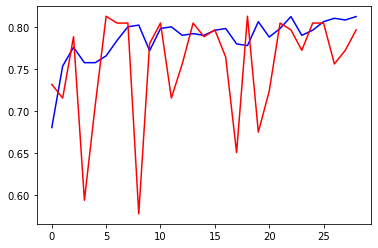

In [21]:
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

## Training using Entire data

In [22]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(Xnew,Ynew,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 10ms/step - loss: 0.5593 - accuracy: 0.7313 - val_loss: 0.7020 - val_accuracy: 0.7073
Epoch 2/250
20/20 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.7866 - val_loss: 0.6235 - val_accuracy: 0.8130
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7948 - val_loss: 0.5543 - val_accuracy: 0.8211
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7883 - val_loss: 0.5570 - val_accuracy: 0.7642
Epoch 5/250
20/20 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7818 - val_loss: 0.5664 - val_accuracy: 0.8211
Epoch 6/250
20/20 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7850 - val_loss: 0.4760 - val_accuracy: 0.8130
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7899 - val_loss: 0.5624 - val_accuracy: 0.8211
Epoch 8/250


In [23]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

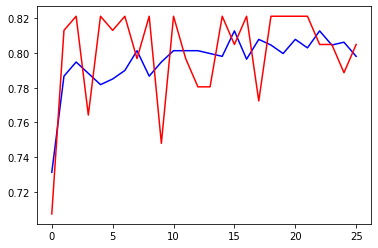

In [24]:
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

# Prediction

In [25]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)

12/12 [==============================] - 0s 2ms/step


In [26]:
pred

array([[0.85612947],
       [0.76879835],
       [0.7921908 ],
       [0.71036136],
       [0.6720901 ],
       [0.73867023],
       [0.74171513],
       [0.06962268],
       [0.80818576],
       [0.774027  ],
       [0.6680937 ],
       [0.8620058 ],
       [0.6672234 ],
       [0.18261993],
       [0.862104  ],
       [0.62767345],
       [0.7862684 ],
       [0.91147566],
       [0.7588855 ],
       [0.8605071 ],
       [0.71758807],
       [0.7363053 ],
       [0.7438458 ],
       [0.6820415 ],
       [0.78912497],
       [0.02278053],
       [0.7088368 ],
       [0.79693246],
       [0.87423587],
       [0.7579423 ],
       [0.8214285 ],
       [0.80273587],
       [0.83218527],
       [0.8315496 ],
       [0.8499472 ],
       [0.11738102],
       [0.8157468 ],
       [0.8242006 ],
       [0.70857775],
       [0.7160479 ],
       [0.853642  ],
       [0.76322985],
       [0.88411933],
       [0.81521803],
       [0.77031755],
       [0.72044003],
       [0.778676  ],
       [0.781

In [27]:
Q=[]
for i in pred:
    Q.append(int(i[0]))

In [28]:
w1 = []
for i in pred:
    if(i<0.5):
        w1.append("N")
    else:
        w1.append("Y")

In [29]:
B["Loan_Status"]=w1

In [30]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.842199,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.842199,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


# 2.If customer is not eligible for the input required amount and duration, what can be amount for the given duration.(Regression)

In [31]:
Xb=B[(B.Loan_Status=="N")]

In [32]:
Xb.shape

(62, 13)

In [34]:
Xb.index=range(0,62)

In [35]:
N_cust=Xb

In [36]:
Xb=Xb.drop(labels=["Loan_ID"],axis=1)

# X and Y

In [37]:
Y= A["LoanAmount"]
X=A.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)
Xb=Xb.drop(labels=["LoanAmount","Loan_Status"],axis=1)

## Cat , Con

In [38]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

### preprocessing

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

### Splitting

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 10ms/step - loss: 19775.5547 - val_loss: 14370.3135
Epoch 2/250
16/16 [==============================] - 0s 4ms/step - loss: 6948.1494 - val_loss: 9265.2471
Epoch 3/250
16/16 [==============================] - 0s 5ms/step - loss: 6276.7993 - val_loss: 9334.7217
Epoch 4/250
16/16 [==============================] - 0s 3ms/step - loss: 6012.6050 - val_loss: 9954.4473
Epoch 5/250
16/16 [==============================] - 0s 4ms/step - loss: 6048.6616 - val_loss: 9199.7021
Epoch 6/250
16/16 [==============================] - 0s 3ms/step - loss: 5770.2090 - val_loss: 9422.5391
Epoch 7/250
16/16 [==============================] - 0s 4ms/step - loss: 5805.5469 - val_loss: 10187.8037
Epoch 8/250
16/16 [==============================] - 0s 4ms/step - loss: 5632.7637 - val_loss: 9856.5283
Epoch 9/250
16/16 [==============================] - 0s 3ms/step - loss: 5763.3618 - val_loss: 10355.0498
Epoch 10/250
16/16 [==============================

In [42]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

### Plot Results

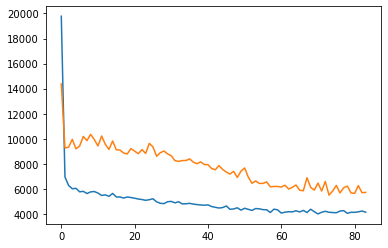

In [43]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

## Training using entire data

In [44]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 9ms/step - loss: 12411.5713 - val_loss: 9274.7686
Epoch 2/250
20/20 [==============================] - 0s 3ms/step - loss: 6971.4209 - val_loss: 9263.0576
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 6922.5854 - val_loss: 10936.4570
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 6634.8960 - val_loss: 10208.2773
Epoch 5/250
20/20 [==============================] - 0s 4ms/step - loss: 6729.3486 - val_loss: 8994.3271
Epoch 6/250
20/20 [==============================] - 0s 3ms/step - loss: 6491.7783 - val_loss: 10892.5322
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 6593.2778 - val_loss: 11147.4004
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 6439.0757 - val_loss: 8692.6650
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 6406.1538 - val_loss: 10148.5527
Epoch 10/250
20/20 [=============================

In [45]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)
pred

2/2 [==============================] - 0s 0s/step


array([[ 84.97179 ],
       [131.31972 ],
       [189.25899 ],
       [ 72.57908 ],
       [ 67.28459 ],
       [ 99.54329 ],
       [ 81.901535],
       [ 74.395035],
       [ 78.05369 ],
       [107.526436],
       [100.05095 ],
       [ 94.030624],
       [ 71.87161 ],
       [102.727646],
       [ 78.48075 ],
       [ 70.345146],
       [ 96.14644 ],
       [ 74.97104 ],
       [ 96.85713 ],
       [110.680824],
       [118.114784],
       [ 87.21509 ],
       [ 89.01163 ],
       [102.47694 ],
       [103.94667 ],
       [ 77.96585 ],
       [ 71.59052 ],
       [ 57.56271 ],
       [ 65.81917 ],
       [100.7509  ],
       [ 72.00992 ],
       [ 79.894135],
       [ 99.67319 ],
       [ 99.3723  ],
       [ 91.53447 ],
       [ 80.61032 ],
       [ 87.50533 ],
       [104.769455],
       [ 93.41087 ],
       [ 91.14072 ],
       [ 79.01695 ],
       [ 94.155266],
       [ 88.327286],
       [ 90.1909  ],
       [ 81.55055 ],
       [101.1557  ],
       [ 79.07828 ],
       [ 99.4

In [46]:
N_cust["Loan_Amount"]=pred
N_cust

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount
0,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N,84.971786
1,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N,131.319717
2,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N,189.258987
3,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N,72.579079
4,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.000000,Urban,N,67.284592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.000000,Semiurban,N,61.012615
58,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N,98.115555
59,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N,96.087738
60,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,0.842199,Rural,N,150.822449


# 3. if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

###` 1.create a regression model from old data to predict duration . 2.choose all the Loan status with "N " and duration <20 years from predicted data 3.predict the loan duration for chosen customers

In [47]:
B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N
245,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N


## X and Y

In [48]:
Y= A["Loan_Amount_Term"]
X=A.drop(labels=["Loan_Amount_Term","Loan_Status","Loan_ID"],axis=1)

Xb=B[((B.Loan_Amount_Term<=240) & (B.Loan_Status =="N"))]

In [49]:
Xb.shape

(5, 13)

In [50]:
Xb.index=range(0,5)

In [51]:
D_cust=Xb
Xb=Xb.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [52]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

### preprocessing

In [53]:
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

## Splitting

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Neural Network

In [55]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 10ms/step - loss: 104362.6641 - val_loss: 73617.3750
Epoch 2/250
16/16 [==============================] - 0s 3ms/step - loss: 36701.3555 - val_loss: 7713.3066
Epoch 3/250
16/16 [==============================] - 0s 4ms/step - loss: 5802.8428 - val_loss: 3888.2175
Epoch 4/250
16/16 [==============================] - 0s 3ms/step - loss: 5015.2524 - val_loss: 4071.1174
Epoch 5/250
16/16 [==============================] - 0s 3ms/step - loss: 5373.9043 - val_loss: 3692.0520
Epoch 6/250
16/16 [==============================] - 0s 3ms/step - loss: 5004.1230 - val_loss: 3915.6208
Epoch 7/250
16/16 [==============================] - 0s 3ms/step - loss: 5033.6514 - val_loss: 3910.7598
Epoch 8/250
16/16 [==============================] - 0s 3ms/step - loss: 4897.7383 - val_loss: 3762.6982
Epoch 9/250
16/16 [==============================] - 0s 3ms/step - loss: 4702.0347 - val_loss: 3772.2495
Epoch 10/250
16/16 [==============================

In [56]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

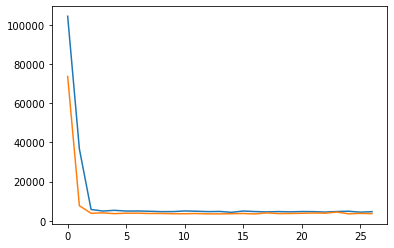

In [57]:
plt.plot(tr_err)
plt.plot(ts_err)

## Training using entire data

In [58]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 7ms/step - loss: 99920.0234 - val_loss: 57169.3398
Epoch 2/250
20/20 [==============================] - 0s 3ms/step - loss: 22461.4160 - val_loss: 4181.0410
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 5059.5547 - val_loss: 3839.9382
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 5088.4985 - val_loss: 3693.7922
Epoch 5/250
20/20 [==============================] - 0s 3ms/step - loss: 4824.8662 - val_loss: 3706.2839
Epoch 6/250
20/20 [==============================] - 0s 3ms/step - loss: 4913.4990 - val_loss: 4582.0913
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 4891.9512 - val_loss: 3838.5801
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 4953.9199 - val_loss: 3735.3848
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 4700.9131 - val_loss: 4715.8071
Epoch 10/250
20/20 [==============================] 

In [59]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [60]:
Xnewb[Xnew.columns]

KeyError: "['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural'] not in index"

In [61]:
Q=['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural']
for i in Q:
    Xnewb[i]=0

In [62]:
final_DF = Xnewb[Xnew.columns]

In [63]:
pred = nn.predict(final_DF)

1/1 [==============================] - 0s 57ms/step


In [64]:
pred

array([[358.10953],
       [357.94333],
       [358.34756],
       [365.3198 ],
       [329.42065]], dtype=float32)

In [65]:
D_cust["Loan_new_term"]=pred

In [66]:
D_cust

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_new_term
0,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.0,Semiurban,N,358.109528
1,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.0,Urban,N,357.943329
2,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban,N,358.347565
3,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N,365.319794
4,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.0,Semiurban,N,329.420654


## This are our Final predictions